# Linear Edge Element for Maxwell Equations in 3D

This example is to show the linear edge element approximation of the electric field of the time harmonic Maxwell equation.
  
\begin{align}
\nabla \times (\mu^{-1}\nabla \times  u) - \omega^2 \varepsilon \, u &= J  \quad  \text{ in } \quad \Omega,  \\
                                  n \times u &= n \times g_D  \quad  \text{ on } \quad \Gamma_D,\\
                    n \times (\mu^{-1}\nabla \times  u) &= n \times g_N  \quad  \text{ on } \quad \Gamma_N.
\end{align}


based on the weak formulation

$$(\mu^{-1}\nabla \times  u, \nabla \times  v) - (\omega^2\varepsilon u,v) = (J,v) - \langle n \times g_N,v \rangle_{\Gamma_N}.$$

**Reference**
- [Finite Element Methods for Maxwell Equations](http://www.math.uci.edu/~chenlong/226/FEMMaxwell.pdf)
- [Programming of Finite Element Methods for Maxwell Equations](http://www.math.uci.edu/~chenlong/226/codeMaxwell.pdf)

**Subroutines**:

    - Maxwell1
    - cubeMaxwell1
    - femMaxwell3
    - Maxwell1femrate
    
The method is implemented in `Maxwell1` subroutine and tested in `cubeMaxwell1`. Together with other elements (ND0,ND1,ND2), `femMaxwell3` provides a concise interface to solve Maxwell equation. The ND1 element is tested in `Maxwell1femrate`. This doc is based on `Maxwell1femrate`.    

## Data Structure

Use the function

    [elem2dof,edge,elem2edgeSign] = dof3edge(elem);

to construct the pointer from element index to edge index. Read
<dof3edgedoc.html Dof on Edges in Three Dimensions> for details.


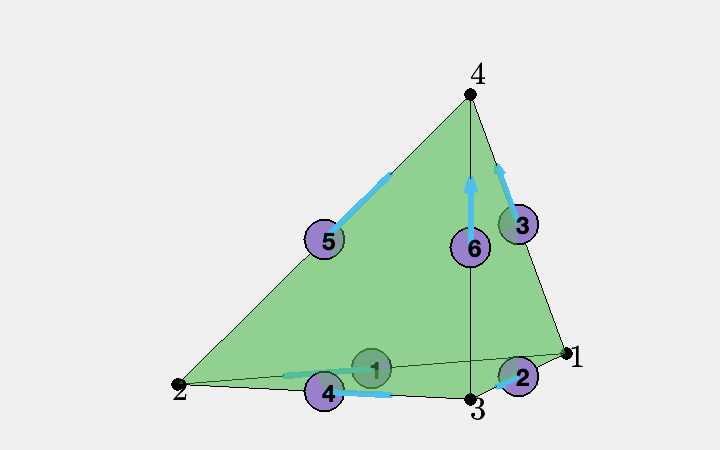

In [2]:
node = [1,0,0; 0,1,0; 0,0,0; 0,0,1];
elem = [1 2 3 4];
localEdge = [1 2; 1 3; 1 4; 2 3; 2 4; 3 4];
imatlab_export_fig('print-png')  % Static png figures.
set(gcf,'Units','normal'); 
set(gcf,'Position',[0.25,0.25,0.25,0.25]);
showmesh3(node,elem);
view(-72,9);
findnode3(node);
findedge(node,localEdge,'all','vec');

The six dofs associated to edges in a tetrahedron is sorted in the ordering `[1 2; 1 3; 1 4; 2 3; 2 4; 3 4]`. Here `[1 2 3 4]` are local indices of vertices.

Globally we use ascend ordering for each element and thus the orientation of the edge is consistent. No need of `elem2edgeSign`. Read [Simplicial complex in three dimensions](../mesh/sc3doc.html) for more discussion of indexing, ordering and orientation.

## Local Bases
Suppose `[i,j]` is the kth edge and `i<j`. The basis is given by 

$$ \phi _k = \lambda_i\nabla \lambda_j - \lambda_j \nabla \lambda_i,\qquad
   \nabla \times \phi_k = 2\nabla \lambda_i \times \nabla \lambda_j.$$

Inside one tetrahedron, the 6 bases functions along with their curl
corresponding to 6 local edges `[1 2; 1 3; 1 4; 2 3; 2 4; 3 4]` are

$$ \phi_1 = \lambda_1\nabla\lambda_2 - \lambda_2\nabla\lambda_1,\qquad
   \nabla \times \phi_1 = 2\nabla\lambda_1\times \nabla\lambda_2,$$

$$ \phi_2 = \lambda_1\nabla\lambda_3 - \lambda_3\nabla\lambda_1,\qquad
   \nabla \times \phi_2 = 2\nabla\lambda_1\times \nabla\lambda_3,$$

$$ \phi_3 = \lambda_1\nabla\lambda_4 - \lambda_4\nabla\lambda_1,\qquad
   \nabla \times \phi_3 = 2\nabla\lambda_1\times \nabla\lambda_4,$$

$$ \phi_4 = \lambda_2\nabla\lambda_3 - \lambda_3\nabla\lambda_2,\qquad
   \nabla \times \phi_4 = 2\nabla\lambda_2\times \nabla\lambda_3,$$

$$ \phi_5 = \lambda_2\nabla\lambda_4 - \lambda_4\nabla\lambda_2,\qquad
   \nabla \times \phi_5 = 2\nabla\lambda_2\times \nabla\lambda_4,$$

$$ \phi_6 = \lambda_3\nabla\lambda_4 - \lambda_4\nabla\lambda_3,\qquad
   \nabla \times \phi_6 = 2\nabla\lambda_3\times \nabla\lambda_4.$$


The additional 6 bases for the second family are:

$$ \psi_k = \lambda_i\nabla \lambda_j + \lambda_j \nabla \lambda_i,\qquad
   \nabla \times \psi_k = 0.$$

$$ \psi_1 = \lambda_1\nabla\lambda_2 + \lambda_2\nabla\lambda_1,$$

$$ \psi_2 = \lambda_1\nabla\lambda_3 + \lambda_3\nabla\lambda_1,$$

$$ \psi_3 = \lambda_1\nabla\lambda_4 + \lambda_4\nabla\lambda_1,$$

$$ \psi_4 = \lambda_2\nabla\lambda_3 + \lambda_3\nabla\lambda_2,$$

$$ \psi_5 = \lambda_2\nabla\lambda_4 + \lambda_4\nabla\lambda_2,$$

$$ \psi_6 = \lambda_3\nabla\lambda_4 + \lambda_4\nabla\lambda_3.$$


## Degree of freedoms

Suppose `[i,j]` is the kth edge and `i<j`. The corresponding degree of freedom is

$$l_k (v) = \int_{e_k} v\cdot t \, {\rm d}s \approx \frac{1}{2}[v(i)+v(j)]\cdot e_{k}.$$

It is dual to the basis $\{\phi_k\}$ in the sense that

$$l_{\ell}(\phi _k) = \delta_{k,\ell}.$$

The additional 6 degree of freedoms are:

$$l_k^1 (v) = 3\int_{e_k} v\cdot t(\lambda _i - \lambda_j) \, {\rm d}s  \approx \frac{1}{2}[v(i) - v(j)]\cdot e_{k}.$$


## Dirichlet boundary condition

Dirichlet boundary conditions. 
#dof:     1208, Direct solver  0.1 
#dof:     8368, Direct solver 0.23 
Conjugate Gradient Method using HX preconditioner 
#dof:    62048,   #nnz:  1372268,   iter: 37,   err = 6.5415e-09,   time =  1.6 s
Conjugate Gradient Method using HX preconditioner 
#dof:   477376,   #nnz: 11791756,   iter: 36,   err = 9.7991e-09,   time =   11 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  1208   2.500e-01   5.52165e-02   3.96067e-01   7.95505e-02   3.10119e-03
  8368   1.250e-01   1.36258e-02   1.97200e-01   4.02371e-02   4.33068e-04
 62048   6.250e-02   3.39303e-03   9.84696e-02   2.02922e-02   5.78792e-05
477376   3.125e-02   8.47174e-04   4.92119e-02   1.01987e-02   7.53487e-06

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

  1208   9.00e-02   1.00e-01   4.00e-02   1.00e-02
  8368   1.20e-01   2.30e-01   7.00e-02   1.00e-02
 62048   7.90e-01   1.56e+00   2.20e-01   5.00e-02
477376   6.15

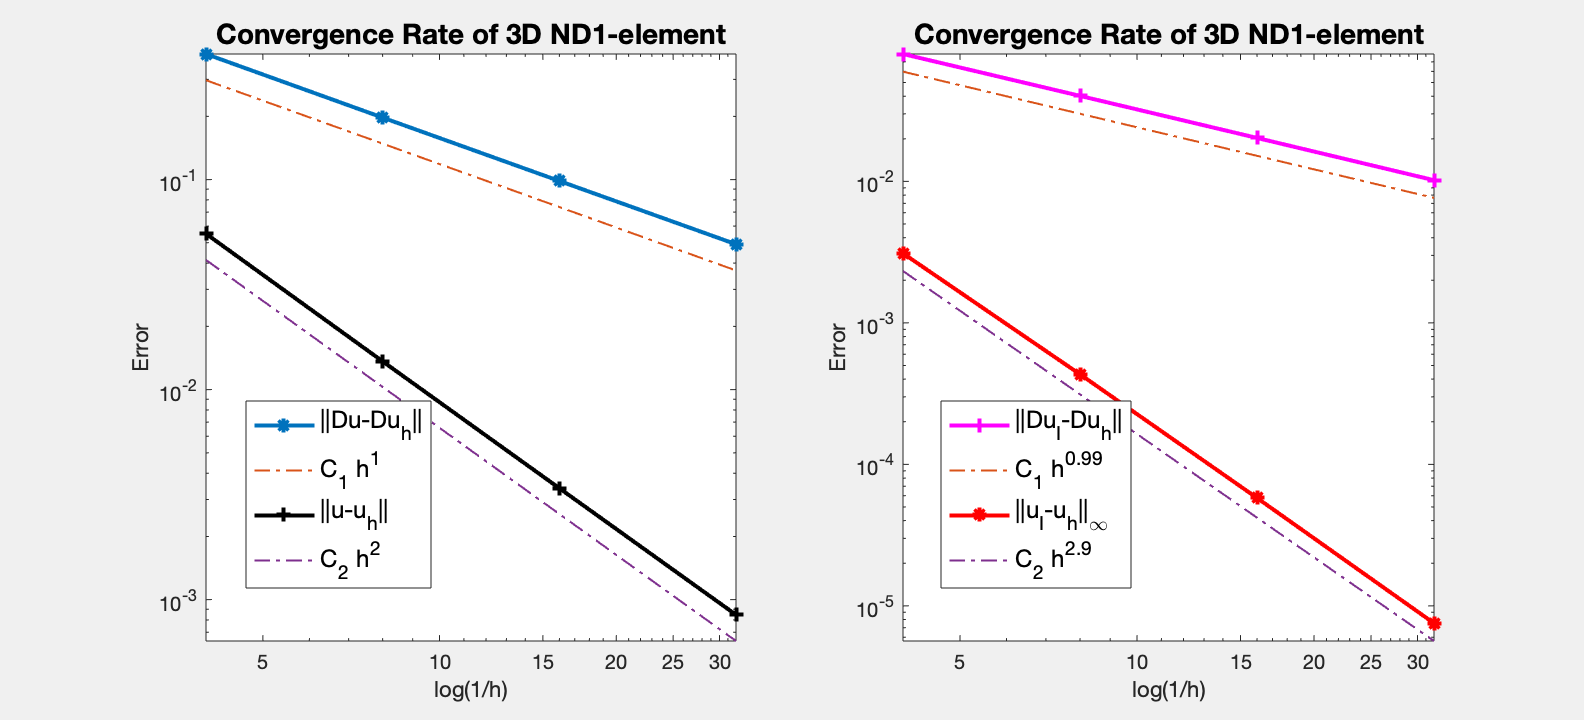

In [3]:
%% Setting
[node,elem] = cubemesh([-1,1,-1,1,-1,1],1);
mesh = struct('node',node,'elem',elem);
option.L0 = 1;
option.maxIt = 4;
option.elemType = 'ND1';
option.printlevel = 1;

%% Dirichlet boundary condition.
fprintf('Dirichlet boundary conditions. \n');    
pde = Maxwelldata2;
bdFlag = setboundary3(node,elem,'Dirichlet');
femMaxwell3(mesh,pde,option);

## Pure Neumann boundary condition

Neumann boundary condition. 
#dof:     1208, Direct solver 0.06 
#dof:     8368, Direct solver 0.35 
Conjugate Gradient Method using HX preconditioner 
#dof:    62048,   #nnz:  1628576,   iter: 43,   err = 8.7403e-09,   time =    2 s
Conjugate Gradient Method using HX preconditioner 
#dof:   477376,   #nnz: 12838720,   iter: 43,   err = 9.4520e-09,   time =   13 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  1208   2.500e-01   2.41877e-02   3.90295e-01   9.93550e-02   1.88901e-02
  8368   1.250e-01   6.28974e-03   1.96199e-01   4.40961e-02   2.94393e-03
 62048   6.250e-02   1.59327e-03   9.82971e-02   2.10068e-02   4.34979e-04
477376   3.125e-02   4.00195e-04   4.91812e-02   1.03323e-02   6.24133e-05

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

  1208   6.00e-02   6.00e-02   1.00e-02   0.00e+00
  8368   1.80e-01   3.50e-01   4.00e-02   1.00e-02
 62048   7.00e-01   1.95e+00   2.20e-01   4.00e-02
477376   5.47e+0

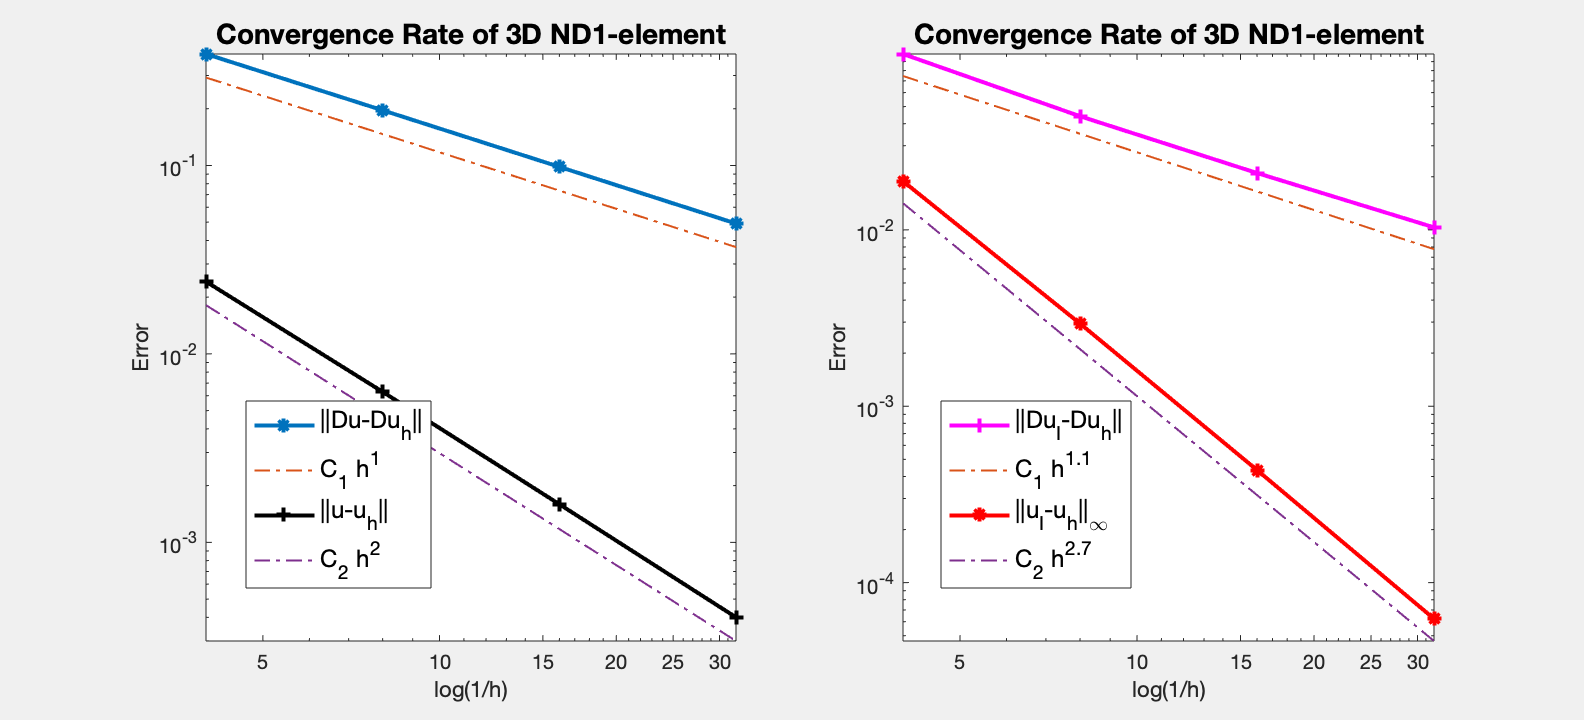

In [5]:
%% Pure Neumann boundary condition.
fprintf('Neumann boundary condition. \n');
option.plotflag = 0;
pde = Maxwelldata2;
mesh.bdFlag = setboundary3(node,elem,'Neumann');
femMaxwell3(mesh,pde,option);

## Conclusion 

The H(curl)-norm is still 1st order but the L2-norm is improved to 2nd order. 

MGCG using HX preconditioner converges uniformly in all cases.